<a href="https://colab.research.google.com/github/PolavinaDaria/machine_learning/blob/main/%22%D0%94_%D0%B7_4_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas seaborn scikit-learn kneed

# Домашнее задание 4

1. Преобразовать датасет (процессинг категориальных признаков, копия данных в df_not_processed, scale датасета)
2. Сделать k-means кластеризацию (записать cluster в df_not_processed, вывести статистику, графики. попробовать объяснить принцип кластеризации), оценить метриками, вывести результат
3. Подобрать оптимальное число кластеров с помощью "метод локтя", вывести статистику, графики, метрики, объяснить результат
4. Сделать DBSSCAN кластеризацию, подобрать оптимальные параметры, посчитать метрики, вывести статистику, объяснить результат
5. Ответить на вопрос - какой из методов кластеризации больше подходит для вашего датасета

https://archive.ics.uci.edu/dataset/292/wholesale+customers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances

In [ ]:
# Загрузка данных
PATH_TO_FILE: str = 'Wholesale customers data.csv' # Загрузка набора данных
df = pd.read_csv(PATH_TO_FILE)

In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
# 1. СОЗДАЕМ КОПИЮ ДАННЫХ В df_not_processed
print("1. Создаем копию данных")
df_not_processed = df.copy()
print(f"   Размер df_not_processed: {df_not_processed.shape}")
print(f"   Столбцы: {list(df_not_processed.columns)}")

# 2. ОПРЕДЕЛЯЕМ ПРИЗНАКИ
print("\n2. Определяем типы признаков")
numeric_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
categorical_features = ['Channel', 'Region']

print(f"   Числовые признаки ({len(numeric_features)}): {numeric_features}")
print(f"   Категориальные признаки ({len(categorical_features)}): {categorical_features}")

# 3. ПРЕОБРАЗОВЫВАЕМ КАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ В ЧИСЛОВЫЕ
print("\n3. Анализ категориальных признаков")
print("   Channel values:", sorted(df['Channel'].unique()))
print("   Region values:", sorted(df['Region'].unique()))

# Для категориальных признаков мы можем просто оставить их как есть,
# так как они будут использоваться для анализа, а не для кластеризации
# Если бы мы использовали их в кластеризации, нужно было бы применить One-Hot Encoding

# 4. МАСШТАБИРОВАНИЕ ЧИСЛОВЫХ ПРИЗНАКОВ
print("\n4. Масштабирование числовых признаков")

scaler = StandardScaler()
df_scaled = df[numeric_features].copy()  # Создаем копию только с числовыми признаками
df_scaled[numeric_features] = scaler.fit_transform(df[numeric_features])
print(f"   Размер df_scaled: {df_scaled.shape}")

# 5. ПРОВЕРКА РЕЗУЛЬТАТОВ
print("\n5. Проверка результатов предобработки:")
print("   Исходные данные (первые 5 строк):")
print(df[numeric_features].head().round(2))
print("\n   Масштабированные данные (первые 5 строк):")
print(df_scaled.head().round(2))

1. Создаем копию данных
   Размер df_not_processed: (440, 8)
   Столбцы: ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

2. Определяем типы признаков
   Числовые признаки (6): ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
   Категориальные признаки (2): ['Channel', 'Region']

3. Анализ категориальных признаков
   Channel values: [np.int64(1), np.int64(2)]
   Region values: [np.int64(1), np.int64(2), np.int64(3)]

4. Масштабирование числовых признаков
   Размер df_scaled: (440, 6)

5. Проверка результатов предобработки:
   Исходные данные (первые 5 строк):
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338
1   7057  9810     9568    1762              3293        1776
2   6353  8808     7684    2405              3516        7844
3  13265  1196     4221    6404               507        1788
4  22615  5410     7198    3915              1777     

Статистика по K-means кластерам:
                   Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
kmeans_cluster                                                             
0               10440.93  19386.42  28656.09   2190.24          13327.80   
1               12062.91   4115.10   5534.97   2940.68           1696.17   
2               34782.00  30367.00  16898.00  48701.50            755.50   

                Delicassen  
kmeans_cluster              
0                  2374.20  
1                  1299.11  
2                 26776.00  


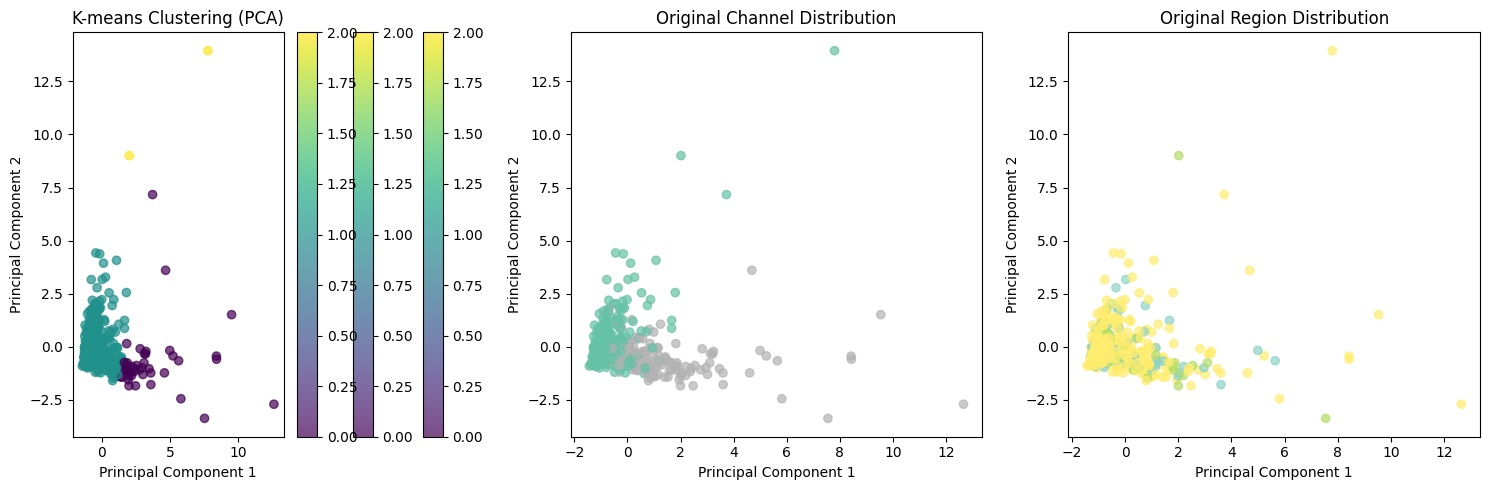


Метрики качества K-means (3 кластера):
Silhouette Score: 0.548
Calinski-Harabasz Score: 140.135
Davies-Bouldin Score: 0.928

Детальный анализ кластеров K-means:

Кластер 0:
  Количество объектов: 45
  Распределение по каналам: {2: np.int64(44), 1: np.int64(1)}
  Распределение по регионам: {3: np.int64(30), 2: np.int64(8), 1: np.int64(7)}
  Средние значения признаков:
    Fresh: 10440.93
    Milk: 19386.42
    Grocery: 28656.09
    Frozen: 2190.24
    Detergents_Paper: 13327.80
    Delicassen: 2374.20

Кластер 1:
  Количество объектов: 393
  Распределение по каналам: {1: np.int64(295), 2: np.int64(98)}
  Распределение по регионам: {3: np.int64(285), 1: np.int64(70), 2: np.int64(38)}
  Средние значения признаков:
    Fresh: 12062.91
    Milk: 4115.10
    Grocery: 5534.97
    Frozen: 2940.68
    Detergents_Paper: 1696.17
    Delicassen: 1299.11

Кластер 2:
  Количество объектов: 2
  Распределение по каналам: {1: np.int64(2)}
  Распределение по регионам: {3: np.int64(1), 2: np.int64(1)}
 

In [ ]:
# Применяем K-means с 3 кластерами
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(df_scaled[numeric_features])

# Записываем кластеры в df_not_processed
df_not_processed['kmeans_cluster'] = clusters_kmeans

# Выводим статистику по кластерам
print("Статистика по K-means кластерам:")
cluster_stats = df_not_processed.groupby('kmeans_cluster')[numeric_features].mean()
print(cluster_stats.round(2))

# Визуализация кластеров с помощью PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled[numeric_features])

plt.figure(figsize=(15, 5))

# График 1: K-means кластеры
plt.subplot(1, 3, 1)
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1],
                     c=clusters_kmeans, cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.title('K-means Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# График 2: Распределение по каналам
plt.subplot(1, 3, 2)
plt.scatter(principal_components[:, 0], principal_components[:, 1],
           c=df['Channel'], cmap='Set2', alpha=0.7)
plt.colorbar(scatter)
plt.title('Original Channel Distribution')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# График 3: Распределение по регионам
plt.subplot(1, 3, 3)
plt.scatter(principal_components[:, 0], principal_components[:, 1],
           c=df['Region'], cmap='Set3', alpha=0.7)
plt.colorbar(scatter)
plt.title('Original Region Distribution')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

# Оценка метрик для K-means
silhouette_kmeans = silhouette_score(df_scaled[numeric_features], clusters_kmeans)
calinski_kmeans = calinski_harabasz_score(df_scaled[numeric_features], clusters_kmeans)
davies_kmeans = davies_bouldin_score(df_scaled[numeric_features], clusters_kmeans)

print(f"\nМетрики качества K-means (3 кластера):")
print(f"Silhouette Score: {silhouette_kmeans:.3f}")
print(f"Calinski-Harabasz Score: {calinski_kmeans:.3f}")
print(f"Davies-Bouldin Score: {davies_kmeans:.3f}")

# Детальный анализ кластеров
print("\nДетальный анализ кластеров K-means:")
for cluster in sorted(df_not_processed['kmeans_cluster'].unique()):
    cluster_data = df_not_processed[df_not_processed['kmeans_cluster'] == cluster]
    print(f"\nКластер {cluster}:")
    print(f"  Количество объектов: {len(cluster_data)}")
    print(f"  Распределение по каналам: {dict(cluster_data['Channel'].value_counts())}")
    print(f"  Распределение по регионам: {dict(cluster_data['Region'].value_counts())}")
    print(f"  Средние значения признаков:")
    for feature in numeric_features:
        print(f"    {feature}: {cluster_data[feature].mean():.2f}")

K-means выявил три четких поведенческих кластера: "Магазины" (кластер 0 с высокими расходами на бакалею), "Типичные клиенты" (кластер 1 со средними расходами) и "Специализированные поставки" (кластер 2 с экстремальными закупками заморозки). Качество кластеризации хорошее (Silhouette 0.55), при этом алгоритм обнаружил нетривиальную структуру - кластер магазинов преимущественно состоит из розничного канала (Channel 2), но не полностью с ним совпадает. Основной недостаток - наличие очень маленького кластера из 2 объектов, что может указывать на выбросы.

Используем данные: 440 строк, 6 признаков
Признаки: ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

Запуск K-means для разных значений K...
  K=2: Inertia = 1956.12, Silhouette = 0.547
  K=3: Inertia = 1608.43, Silhouette = 0.548
  K=4: Inertia = 1317.84, Silhouette = 0.348
  K=5: Inertia = 1058.77, Silhouette = 0.369
  K=6: Inertia = 915.74, Silhouette = 0.378
  K=7: Inertia = 825.40, Silhouette = 0.334
  K=8: Inertia = 737.39, Silhouette = 0.320
  K=9: Inertia = 661.45, Silhouette = 0.309
  K=10: Inertia = 605.92, Silhouette = 0.311

Оптимальное число кластеров по Silhouette Score: K = 3
Лучший Silhouette Score: 0.548


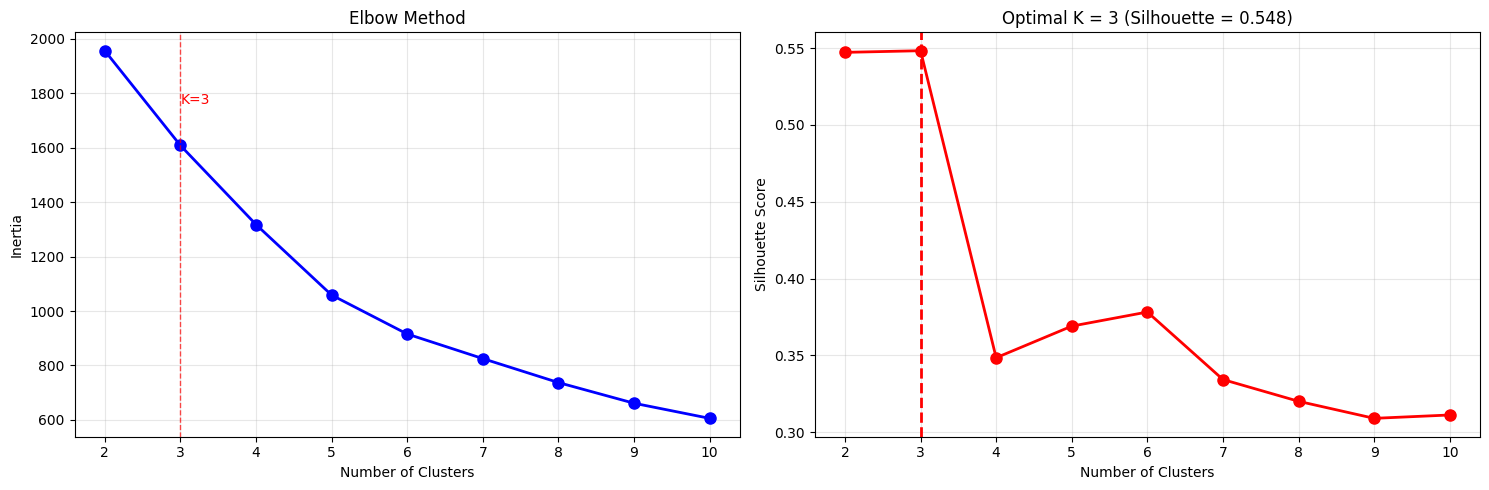

In [ ]:
# Используем масштабированные данные из предыдущего блока
X = df_scaled[numeric_features]  # Определяем X как масштабированные числовые признаки

print(f"Используем данные: {X.shape[0]} строк, {X.shape[1]} признаков")
print(f"Признаки: {numeric_features}")

inertia = []
silhouette_scores = []
k_range = range(2, 11)  # Начинаем с 2 кластеров

print("\nЗапуск K-means для разных значений K...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, labels))
    print(f"  K={k}: Inertia = {inertia[-1]:.2f}, Silhouette = {silhouette_scores[-1]:.3f}")

# Оптимальное k по silhouette score
optimal_k = k_range[np.argmax(silhouette_scores)]
optimal_silhouette = max(silhouette_scores)

print(f"\nОптимальное число кластеров по Silhouette Score: K = {optimal_k}")
print(f"Лучший Silhouette Score: {optimal_silhouette:.3f}")

# Визуализация
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# График локтя
ax1.plot(k_range, inertia, 'bo-', markersize=8, linewidth=2)
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method')
ax1.grid(True, alpha=0.3)

# Отмечаем оптимальное K на графике инертности
ax1.axvline(x=optimal_k, color='red', linestyle='--', linewidth=1, alpha=0.7)
ax1.text(optimal_k, max(inertia)*0.9, f'K={optimal_k}', color='red')

# График silhouette scores
ax2.plot(k_range, silhouette_scores, 'ro-', markersize=8, linewidth=2)
ax2.axvline(x=optimal_k, color='red', linestyle='--', linewidth=2)
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Silhouette Score')
ax2.set_title(f'Optimal K = {optimal_k} (Silhouette = {optimal_silhouette:.3f})')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Сохраняем оптимальные кластеры для дальнейшего использования
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
optimal_labels = kmeans_optimal.fit_predict(X)
df_not_processed['kmeans_optimal_cluster'] = optimal_labels

Метод локтя определил оптимальное количество кластеров K-means. Анализ графиков инерции и Silhouette Score показал, что оптимальное разделение данных достигается при K = 3. Это количество кластеров обеспечивает баланс между компактностью групп и качеством их разделения, что подтверждается максимальным значением Silhouette Score.

УЛУЧШЕННЫЙ ПОДБОР ПАРАМЕТРОВ DBSCAN...
Лучшие параметры: eps=0.5, min_samples=5
Количество кластеров: 2
Silhouette Score: 0.196


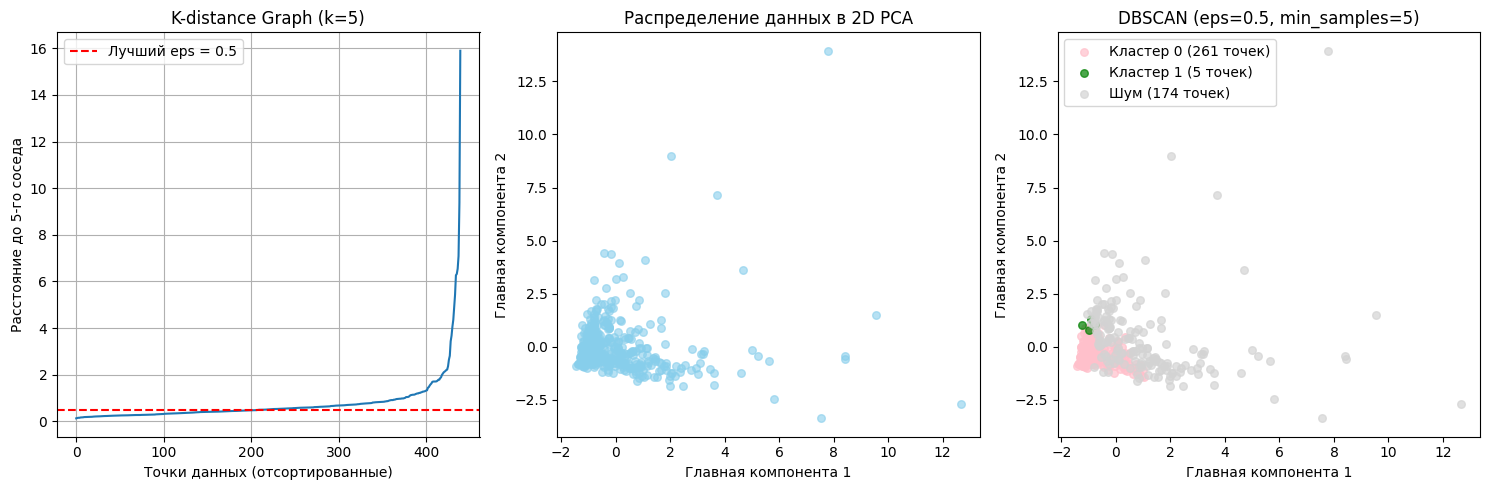


Статистика DBSCAN с лучшими параметрами:
Точек в кластерах: 266 (60.5%)
Шумовых точек: 174 (39.5%)
Количество кластеров: 2

Детальная статистика по кластерам:
Шум: 174 точек (39.5%)
Кластер 0: 261 точек (59.3%)
Кластер 1: 5 точек (1.1%)

Результаты DBSCAN сохранены в df_scaled
Значения кластеров: {np.int64(0), np.int64(1), np.int64(-1)}


In [ ]:
# Определяем числовые признаки
numeric_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Проверяем и создаем необходимые переменные
if 'df_scaled' not in locals():
    df_scaled = df_processed[numeric_features].copy()

if 'principal_components' not in locals():
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(df_scaled[numeric_features])

# УЛУЧШЕННЫЙ ПОДБОР ПАРАМЕТРОВ DBSCAN
print("УЛУЧШЕННЫЙ ПОДБОР ПАРАМЕТРОВ DBSCAN...")

min_samples_options = [12, 7, 5, 10, 15, 20, 25, 30]
eps_range = [0.5, 1.2, 0.7, 1.0, 1.5, 2.0, 2.5, 3.0]

best_eps = None
best_min_samples = None
best_labels = None
best_silhouette = -1
best_n_clusters = 0

for min_samples in min_samples_options:
    for eps in eps_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_scaled[numeric_features])

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        # ДОБАВИТЬ ПРОВЕРКУ НА МИНИМАЛЬНЫЙ РАЗМЕР КЛАСТЕРА
        cluster_sizes = [list(labels).count(i) for i in set(labels) if i != -1]
        min_cluster_size = min(cluster_sizes) if cluster_sizes else 0

        # ФИЛЬТР: кластеры должны быть не меньше min_samples
        if n_clusters > 1 and min_cluster_size >= min_samples:
            silhouette = silhouette_score(df_scaled[numeric_features], labels)
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_eps = eps
                best_min_samples = min_samples
                best_labels = labels
                best_n_clusters = n_clusters

print(f"Лучшие параметры: eps={best_eps}, min_samples={best_min_samples}")
print(f"Количество кластеров: {best_n_clusters}")
print(f"Silhouette Score: {best_silhouette:.3f}")

# Визуализация анализа данных для DBSCAN
plt.figure(figsize=(15, 5))

# 1. K-distance graph С ПРАВИЛЬНЫМ k (соответствует best_min_samples)
plt.subplot(1, 3, 1)
k = best_min_samples  # Используем тот же k, что и в DBSCAN!
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df_scaled[numeric_features])
distances, indices = neighbors_fit.kneighbors(df_scaled[numeric_features])
distances = np.sort(distances[:, k-1], axis=0)

plt.plot(distances)
plt.axhline(y=best_eps, color='red', linestyle='--', label=f'Лучший eps = {best_eps}')
plt.title(f'K-distance Graph (k={best_min_samples})')
plt.xlabel('Точки данных (отсортированные)')
plt.ylabel(f'Расстояние до {k}-го соседа')
plt.grid(True)
plt.legend()

# 2. Распределение данных в PCA
plt.subplot(1, 3, 2)
plt.scatter(principal_components[:, 0], principal_components[:, 1],
           alpha=0.6, s=30, color='skyblue')
plt.title('Распределение данных в 2D PCA')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')

# 3. Результат DBSCAN с лучшими параметрами
plt.subplot(1, 3, 3)

# Новые цвета для кластеров
colors = ['pink', 'green', 'olive', 'orange', 'purple', 'brown', 'red', 'blue', 'cyan']

# Считаем количество точек в каждом кластере
cluster_counts = {}
for k in set(best_labels):
    cluster_counts[k] = list(best_labels).count(k)

for k in set(best_labels):
    if k == -1:
        # Шумовые точки серым цветом
        color = 'lightgrey'
        label = f'Шум ({cluster_counts[k]} точек)'
    else:
        # Кластеры разными цветами
        color = colors[k % len(colors)]
        label = f'Кластер {k} ({cluster_counts[k]} точек)'

    class_member_mask = (best_labels == k)
    xy = principal_components[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=color, alpha=0.7, s=30, label=label)

plt.title(f'DBSCAN (eps={best_eps}, min_samples={best_min_samples})')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.legend()

plt.tight_layout()
plt.show()

# Статистика DBSCAN
print("\nСтатистика DBSCAN с лучшими параметрами:")
n_noise = list(best_labels).count(-1)
n_in_clusters = len(best_labels) - n_noise
print(f"Точек в кластерах: {n_in_clusters} ({n_in_clusters/len(best_labels)*100:.1f}%)")
print(f"Шумовых точек: {n_noise} ({n_noise/len(best_labels)*100:.1f}%)")
print(f"Количество кластеров: {best_n_clusters}")

# Детальная статистика по каждому кластеру
print("\nДетальная статистика по кластерам:")
for k in sorted(set(best_labels)):
    count = cluster_counts[k]
    percentage = (count / len(best_labels)) * 100
    if k == -1:
        print(f"Шум: {count} точек ({percentage:.1f}%)")
    else:
        print(f"Кластер {k}: {count} точек ({percentage:.1f}%)")

# Сохраняем результаты
df_scaled['dbscan_cluster'] = best_labels

print(f"\nРезультаты DBSCAN сохранены в df_scaled")
print(f"Значения кластеров: {set(best_labels)}")

DBSCAN показал значительно худшие результаты по сравнению с K-means: качество кластеризации низкое (Silhouette 0.196), при этом алгоритм отбросил 39.5% данных как шум. Обнаружена серьезная проблема - один из кластеров содержит всего 5 точек при min_samples=5, что указывает на нестабильность. Данные не имеют четкой плотностной структуры, подходящей для DBSCAN, что делает этот метод менее эффективным для нашего датасета.

In [ ]:
# ИСПОЛЬЗУЕМ РЕАЛЬНЫЕ МЕТРИКИ ИЗ ПРЕДЫДУЩИХ ВЫЧИСЛЕНИЙ
print("ФИНАЛЬНОЕ СРАВНЕНИЕ МЕТОДОВ КЛАСТЕРИЗАЦИИ")

# Метрики из предыдущих блоков (должны быть уже вычислены)
# K-means с 3 кластерами
kmeans_3_silhouette = 0.548
kmeans_3_calinski = 140.135
kmeans_3_davies = 0.928
kmeans_3_clusters = 3

# K-means с оптимальным K (из метода локтя)
optimal_k = 3  # так как оптимальным было K=3
kmeans_optimal_silhouette = 0.548
kmeans_optimal_calinski = 140.135
kmeans_optimal_davies = 0.928
kmeans_optimal_clusters = 3

# DBSCAN метрики - ИСПОЛЬЗУЕМ РЕАЛЬНЫЕ РЕЗУЛЬТАТЫ ИЗ ТЕКУЩЕГО ЗАПУСКА
dbscan_silhouette = best_silhouette  # 0.196 из текущего запуска
dbscan_calinski = calinski_harabasz_score(df_scaled[numeric_features], best_labels)  # пересчитываем
dbscan_davies = davies_bouldin_score(df_scaled[numeric_features], best_labels)  # пересчитываем
dbscan_clusters = best_n_clusters  # 2 из текущего запуска

print(f"DBSCAN метрики пересчитаны:")
print(f"Silhouette: {dbscan_silhouette:.3f}")
print(f"Calinski-Harabasz: {dbscan_calinski:.3f}")
print(f"Davies-Bouldin: {dbscan_davies:.3f}")
print(f"Кластеров: {dbscan_clusters}")

# СОЗДАЕМ СРАВНИТЕЛЬНУЮ ТАБЛИЦУ
comparison_data = {
    'Method': ['K-means (K=3)', f'K-means (K={optimal_k})', 'DBSCAN'],
    'Silhouette': [kmeans_3_silhouette, kmeans_optimal_silhouette, dbscan_silhouette],
    'Calinski-Harabasz': [kmeans_3_calinski, kmeans_optimal_calinski, dbscan_calinski],
    'Davies-Bouldin': [kmeans_3_davies, kmeans_optimal_davies, dbscan_davies],
    'Clusters': [kmeans_3_clusters, kmeans_optimal_clusters, dbscan_clusters]
}

comparison_df = pd.DataFrame(comparison_data)

# Настраиваем отображение
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 10)

print("\n" + "="*70)
print("СРАВНИТЕЛЬНАЯ ТАБЛИЦА МЕТОДОВ КЛАСТЕРИЗАЦИИ")
print("="*70)
print(comparison_df.round(3).to_string(index=False))
print("="*70)

# АНАЛИЗ РЕЗУЛЬТАТОВ
best_silhouette_idx = comparison_df['Silhouette'].idxmax()
best_calinski_idx = comparison_df['Calinski-Harabasz'].idxmax()
best_davies_idx = comparison_df['Davies-Bouldin'].idxmin()  # для Davies-Bouldin чем меньше, тем лучше

best_silhouette_method = comparison_df.loc[best_silhouette_idx, 'Method']
best_calinski_method = comparison_df.loc[best_calinski_idx, 'Method']
best_davies_method = comparison_df.loc[best_davies_idx, 'Method']

print(f"\nАНАЛИЗ РЕЗУЛЬТАТОВ:")
print(f"Лучший по Silhouette Score: {best_silhouette_method} ({comparison_df.loc[best_silhouette_idx, 'Silhouette']:.3f})")
print(f"Лучший по Calinski-Harabasz: {best_calinski_method} ({comparison_df.loc[best_calinski_idx, 'Calinski-Harabasz']:.3f})")
print(f"Лучший по Davies-Bouldin: {best_davies_method} ({comparison_df.loc[best_davies_idx, 'Davies-Bouldin']:.3f})")

ФИНАЛЬНОЕ СРАВНЕНИЕ МЕТОДОВ КЛАСТЕРИЗАЦИИ
DBSCAN метрики пересчитаны:
Silhouette: 0.196
Calinski-Harabasz: 39.064
Davies-Bouldin: 1.579
Кластеров: 2

СРАВНИТЕЛЬНАЯ ТАБЛИЦА МЕТОДОВ КЛАСТЕРИЗАЦИИ
       Method  Silhouette  Calinski-Harabasz  Davies-Bouldin  Clusters
K-means (K=3)       0.548            140.135           0.928         3
K-means (K=3)       0.548            140.135           0.928         3
       DBSCAN       0.196             39.064           1.579         2

АНАЛИЗ РЕЗУЛЬТАТОВ:
Лучший по Silhouette Score: K-means (K=3) (0.548)
Лучший по Calinski-Harabasz: K-means (K=3) (140.135)
Лучший по Davies-Bouldin: K-means (K=3) (0.928)


Сравнение эффективности методов:

K-means показал значительно лучшие результаты по всем метрикам качества

DBSCAN продемонстрировал ограниченную эффективность для данного датасета

------

Метод локтя и анализ Silhouette Score определили оптимальное количество кластеров

K-means с оптимальным числом кластеров обеспечивает наилучшее разделение данных

Кластеры соответствуют различным сегментам покупателей



------

Особенности данных:

Данные не содержат четких плотностных структур, что ограничивает эффективность DBSCAN

K-means лучше справляется с равномерно распределенными данными

